In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]

from sklearn.tree import DecisionTreeClassifier

import seaborn as sns
sns.set()

from telperion.Mallorn import Mallorn
from telperion.utils import plot_decision_domains

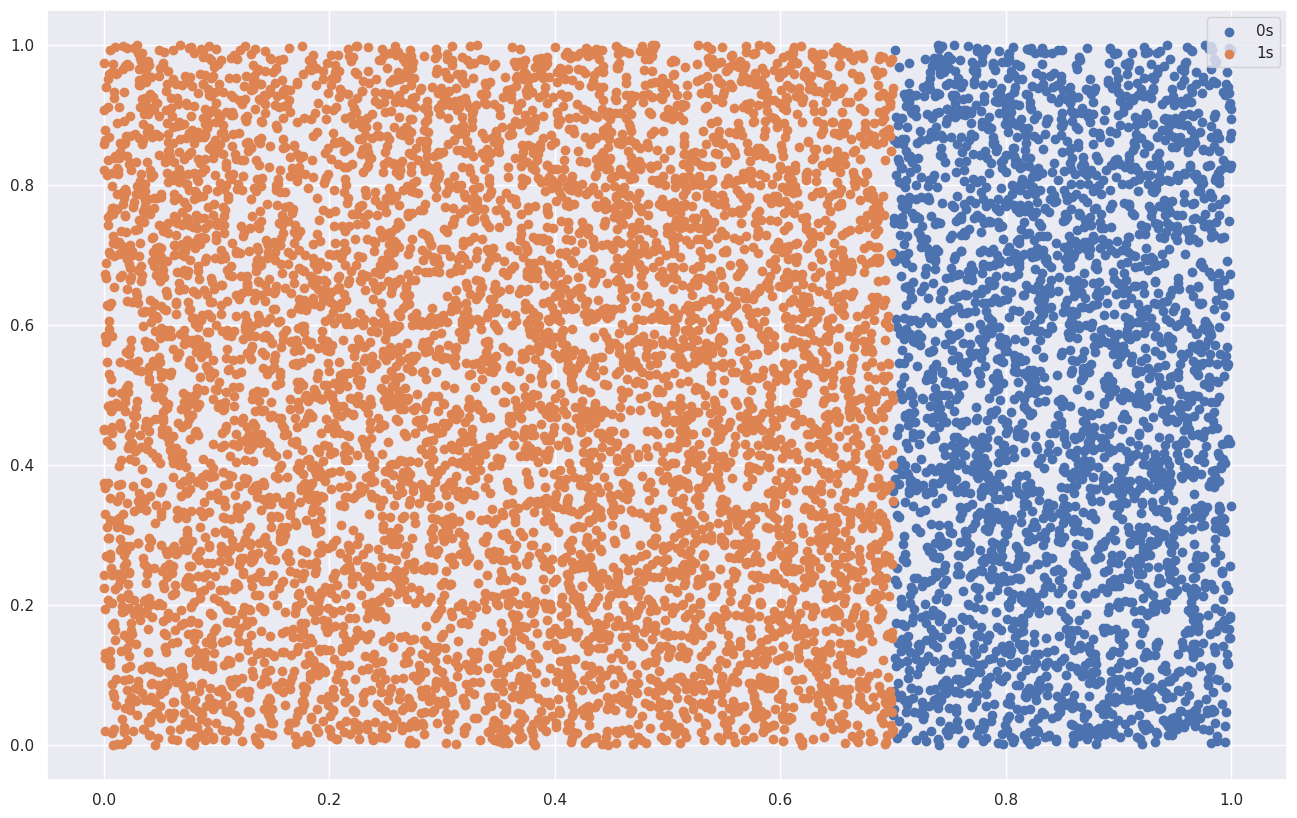

In [2]:
x = np.random.uniform(low=0, high=1, size=(10000,2))
y = np.array([1 if i < 0.7 else 0 for i in x[:,0]])
#y = 1-y

plt.scatter(x[~y.astype(bool),0],x[~y.astype(bool),1], label='0s')
plt.scatter(x[y.astype(bool),0],x[y.astype(bool),1], label='1s')
plt.legend()

In [3]:
hw = Mallorn(max_depth=1) # Basically, just HeartWood, wrapped to yield the correct decision value
hw.fit(x, y, lr=0.01, batch_size=128, epochs=100, metric='gini', method='both', backend='skorch', verbose=0)

w_hw = hw.root.stump.fc.weight.data.squeeze().tolist()
b_hw = hw.root.stump.fc.bias.data.tolist()[0]

print()
print("Feature w:\t{}".format(w_hw))
print("Threshold:\t{}".format(b_hw))
print("Multidim:\t{}".format(hw.root.stump.is_multidim()))


Feature w:	[1.0, 0.0]
Threshold:	-0.7000896334648132
Multidim:	False


In [4]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(x, y)

w_dt = dt.tree_.feature[0]
b_dt = dt.tree_.threshold[0]

print("Feature idx:\t{}".format(w_dt))
print("Threshold:\t{}".format(b_dt))

Feature idx:	0
Threshold:	0.7000896334648132


Text(0.5, 1.0, 'Multi-Dim. DTs')

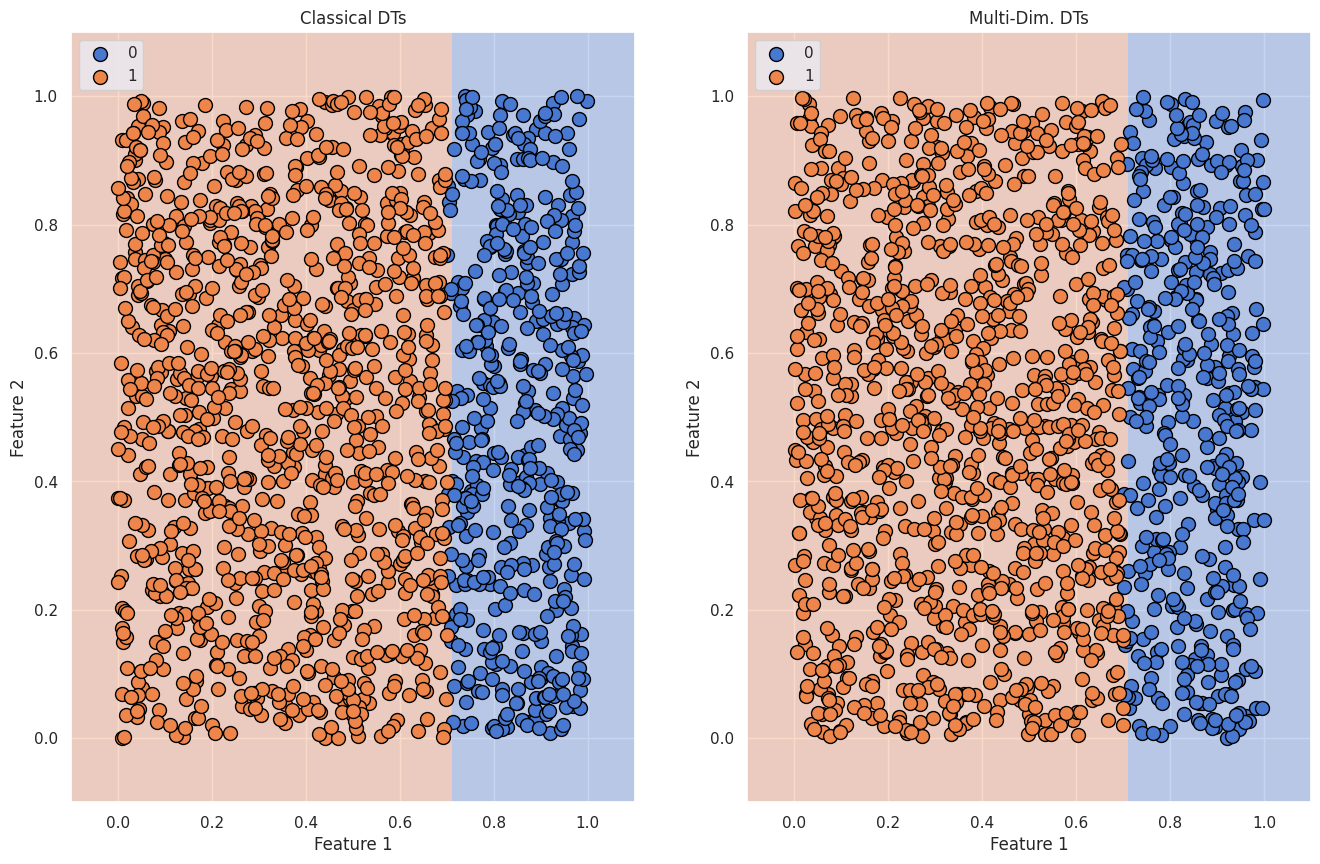

In [5]:
plt.subplot(121)
plot_decision_domains(x, y, dt, margin=0.1, subsample=0.15)
plt.title("Classical DTs")

plt.subplot(122)
plot_decision_domains(x, y, hw, margin=0.1, subsample=0.15)
plt.title("Multi-Dim. DTs")

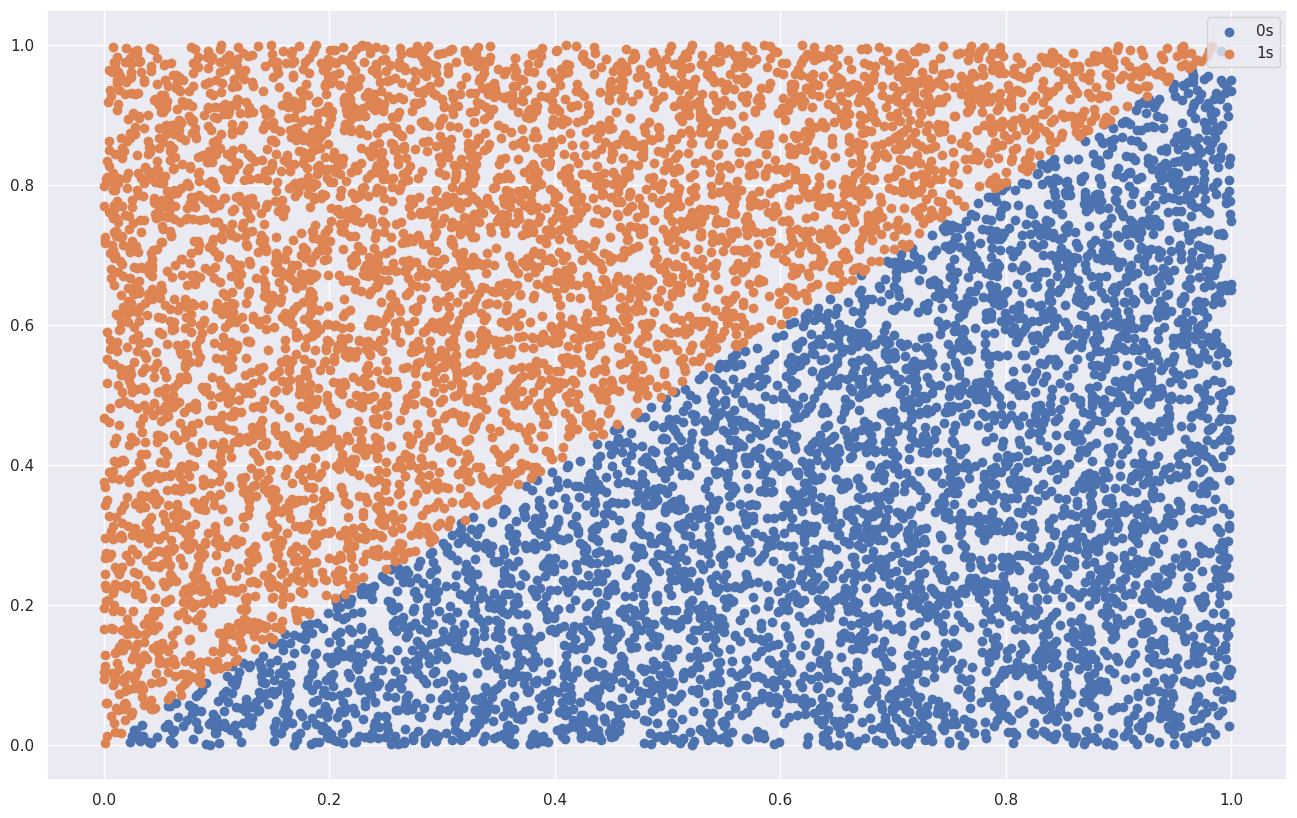

In [6]:
x = np.random.uniform(low=0, high=1, size=(10000,2))
y = np.array([1 if j < i - 0 else 0 for i, j in zip(x[:,0],x[:,1])])
y = 1-y

plt.scatter(x[~y.astype(bool),0],x[~y.astype(bool),1], label='0s')
plt.scatter(x[y.astype(bool),0],x[y.astype(bool),1], label='1s')
plt.legend()

In [7]:
hw = Mallorn(max_depth=1) # Basically, just HeartWood, wrapped to yield the correct decision value
hw.fit(x, y, lr=0.01, batch_size=128, epochs=100, metric='gini', method='both', backend='skorch', verbose=0)

w_hw = hw.root.stump.fc.weight.data.squeeze().tolist()
b_hw = hw.root.stump.fc.bias.data.tolist()[0]

print()
print("Feature w:\t{}".format(w_hw))
print("Threshold:\t{}".format(b_hw))
print("Multidim:\t{}".format(hw.root.stump.is_multidim()))


Feature w:	[-36.53745651245117, 36.540340423583984]
Threshold:	0.01626526191830635
Multidim:	True


In [8]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(x, y)

w_dt = dt.tree_.feature[0]
b_dt = dt.tree_.threshold[0]

print("Feature idx:\t{}".format(w_dt))
print("Threshold:\t{}".format(b_dt))

Feature idx:	1
Threshold:	0.4839317798614502


Text(0.5, 1.0, 'Multi-Dim. DTs')

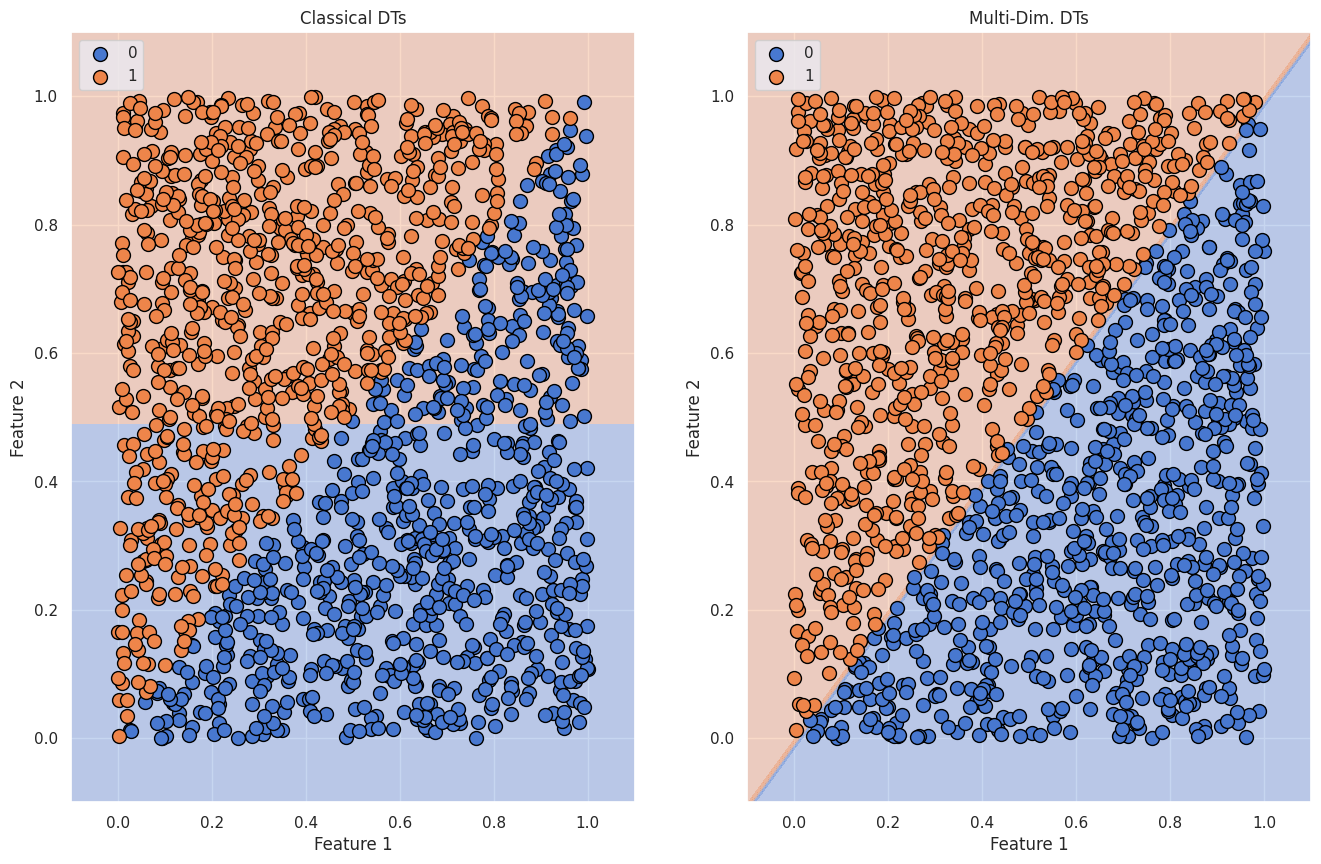

In [9]:
plt.subplot(121)
plot_decision_domains(x, y, dt, margin=0.1, subsample=0.15)
plt.title("Classical DTs")

plt.subplot(122)
plot_decision_domains(x, y, hw, margin=0.1, subsample=0.15)
plt.title("Multi-Dim. DTs")